# Spring Boot - File Upload

> 클라이언트가 서버로 파일을 전송하는 과정
- `html form`으로 전송
- 파일을 문자가 아닌 바이너리 데이터를 전송한다.
    - `enctype="multipart/form-data"`, `method="POST"`가 필수
    - `<input type="file">`
    - `<input type="file" multiple="multiple">`
        - 여러 개 파일을 업로드하는 경우
    

## `MultipartFile`

> SpringFramework에서 파일 업로드를 처리하기 위한 `인터페이스`
- 파일의 내용은 메모리에 저장되거나 디스크에 임시로 저장
- 임시 저장소는 요청이 끝나면 삭제된다.
- `getOriginalFilename()`: 업로드 파일 명
- `transferTo()` : 파일 저장
- 파일 하나당 `1MB`, 요청 1회당 `1MB` 제한

### 실습

`singleFileForm.jsp`
```html
<form action="/singleFileUpload" method="POST" enctype="multipart/form-data">
		<input type="file" name="file"><br>
		<button>submit</button>
	
	</form>
```
- `method`, `enctype` 필수

`FileController`
```java
@PostMapping("/singleFileUpload")
	public String singleFileUpload(@RequestParam("file")MultipartFile file) {
		System.out.println(file.getOriginalFilename());
		return "";
	}
```
- `MultipartFile`
- `.getOriginalFilename`


#### 파일 크기 제한 변경
`application.properties`에서 업로드 파일 크기 제한을 변경할 수 있다.
```xml
#file size
spring.servlet.multipart.max-file-size=20MB
spring.servlet.multipart.max-request-size=100MB
```

#### 서버에 저장하기
저장하는 공간 3가지 (다른 서버, DB, 로컬) 중 서버에 저장해보자.

```java
@Controller
public class FileController {
	// 스프링에서 파일이나 클래스 등등 리소스를 로드할 때 사용하는 인터페이스 
	private ResourceLoader resourceLoader;
	
	// @Autowired가 없어도 생성자가 하나만 있어서 들어있는 것과 같다.
	public FileController(ResourceLoader resourceLoader) {
		this.resourceLoader = resourceLoader;
	}
    ...
}
```
- `ResourceLoader`: 파일을 로드하는 인터페이스
    - 의존성 주입해준다.
    - 생성자가 하나만 있으면 자동으로 된다.

`static` 폴더 아래에 이미지를 저장할 폴더 `img`를 만들어준다.  

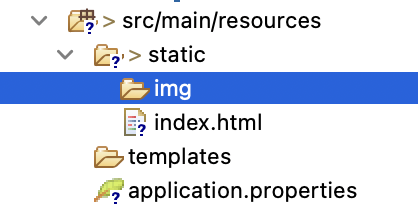


```java
@PostMapping("/singleFileUpload")
	public String singleFileUpload(@RequestParam("file")MultipartFile file) throws IllegalStateException, IOException {
		// 파일이 있는지 확인
		if (file != null && file.getSize() > 0) {
			String fileName = file.getOriginalFilename();
			// tomcat에 저장
			// src/main/resources/static/img
			Resource resource = resourceLoader.getResource("classpath:/static/img");
			file.transferTo(new File(resource.getFile(), fileName));
		}
		
		
		return "";
	}
```
- Resource 인터페이스는 아래를 선택

    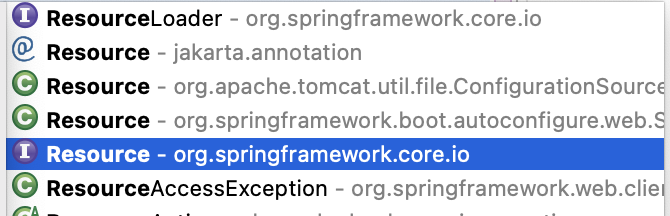
    - 